In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [59]:
df=pd.read_csv('Warsaw_rent_cleaned.csv')
df.head()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasSecurity,hasStorageRoom,price,year,month
0,47.0,2.0,52.257912,20.968610,3.76,33.0,1,1,0,0,5000,2023,11
1,27.0,1.0,52.249800,21.035200,2.95,33.0,1,1,0,0,2950,2023,11
2,51.0,2.0,52.222864,21.009959,1.08,85.0,0,1,0,0,3700,2023,11
3,50.0,3.0,52.224948,21.012136,0.95,124.0,0,0,0,0,5000,2023,11
4,39.8,2.0,52.216513,21.041474,3.09,6.0,0,0,0,0,4500,2023,11


<Axes: >

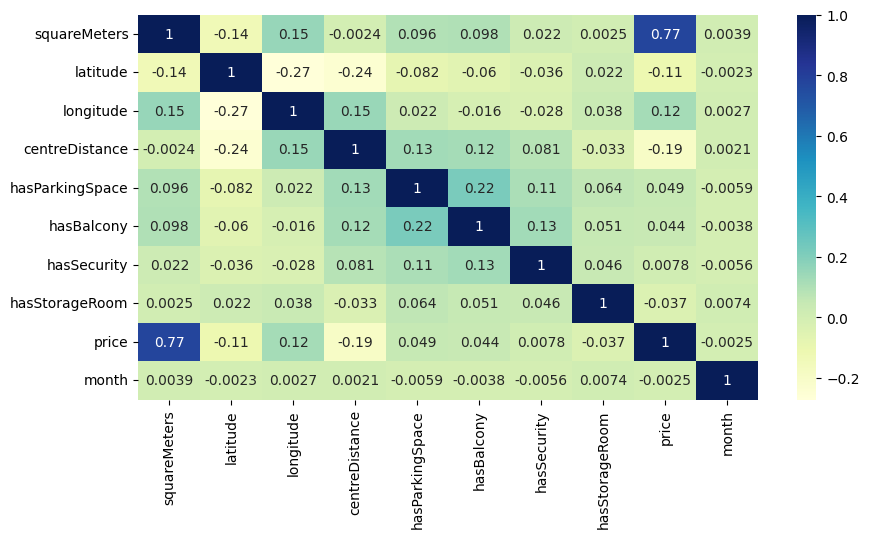

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [ ]:
#usuwam zmienne zależne
df = df.drop(['rooms','poiCount','year'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
print(lm.intercept_)

125004.29052729577


In [63]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
squareMeters,58.685503
rooms,146.297308
latitude,-2661.956971
longitude,759.726424
centreDistance,-118.149003
poiCount,4.722486
hasParkingSpace,15.040691
hasBalcony,15.743738
hasSecurity,30.026736
hasStorageRoom,-327.176894


#### predictions

In [64]:
predictions=lm.predict(X_test)

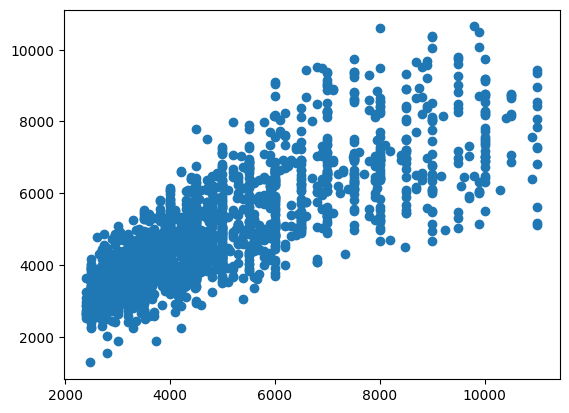

In [65]:
plt.scatter(y_test,predictions)

<Axes: xlabel='price', ylabel='Count'>

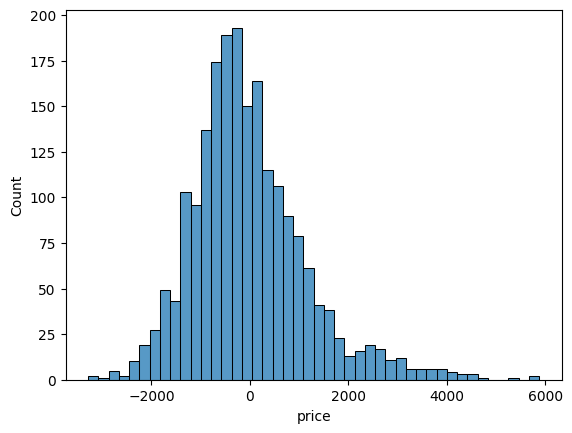

In [66]:
sns.histplot(y_test-predictions)

In [67]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE 879.8031548392028
MSE 1372388.5692985633
RMSE 29.66147593831438


In [68]:
metrics.explained_variance_score(y_test, predictions)

0.6336583834478473